*Goal*: find out if the dataset fits the data requirements

*Data Requirements*:
* user activity is >80% of all time intervals
* month 1, user has >5 rates
* month 0, to pre-train model
* items are comparable
* timestamp
* implicit feedback
* ranking problem


*Conclusion*:
need to install a database to get meta data, so the items are comparable


In [1]:
import os
import sys
sys.path.append(os.path.abspath('') + '/..')

In [2]:
import pandas as pd 
import re
import numpy as np

from data_utils import getDF
from dataset_evaluation_utils import * 

from datetime import datetime, timezone

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# import plotly.offline as py
# pd.options.plotting.backend = "plotly"
# py.init_notebook_mode() # graphs charts inline (IPython).

a4_dims = (11.7, 8.27)

# extract file

In [3]:
# import tarfile 
  
# # open file 
# file = tarfile.open('../datasets/lastfm-dataset-1K.tar.gz') 
  
# # extracting file 
# file.extractall('../datasets/') 
  
# file.close() 

# paths

In [3]:
dataset_name = 'LastFM_1k'
dump_foldername ='lastfm_1k_dump/'

# rule: what/which_data_set/sample_version/what/
images_path, output_path, heatmaps_path, diversity_graphpath, diversity_filepath = get_folderpaths(dump_foldername)

# read file and save rows

In [4]:
names=['user_id', 'timestamp', 'musicbrainz-artist-id', 'artist-name', 'musicbrainz-track-id', 'track-name', 'nextline_char']
n_lines = 19150868 # from readme file
k = 1000
step = 100*k
perc = step/n_lines
# step = int(n_lines*perc)


In [ ]:
# run online
t = 0
all_rows = np.empty((0, len(names)), dtype=object)

file = open('../datasets/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv', 'r')

# skip lines for-case
for s in range(step,  500*k+1, step):
    for i in range(s):
        line = file.readline()

print('start reading on was left on')
for s in range(500*k+step,  n_lines+1, step):
    rows = np.empty((0, len(names)), dtype=object)

    for i in range(s):
        line = file.readline()
        # line_array = line.split('\t|\n')
        line_array = re.split('\t|\n', line) # leave the last '\n' column to make sure the file is read properly
        if (not line) | (len(line_array)!=len(names)):
            print(line)
            print(line_array)
            break
        rows = np.vstack([rows, line_array]) 

    print(s, s/n_lines)
    joblib.dump(rows, output_path+dataset_name+'_rows_'+format(perc, '.5f')+'_next'+format((s/k), '.0f')+'k.joblib')
    
    t += s
    all_rows = np.vstack([all_rows, rows])

joblib.dump(all_rows, output_path+dataset_name+'_all_rows_perc'+format(perc, '.5f')+'_next'+format((t/k), '.0f')+'k.joblib')
file.close()

In [ ]:
# there is no repetition of lines from earlier files within the most recent files
# it just reads a bigger chunk every time

# t = 0
# all_rows = np.empty((0, len(names)), dtype=object)

# file = open('../datasets/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv', 'r')
# for s in range(step,  n_lines+step, step):
#     rows = np.empty((0, len(names)), dtype=object)
    
#     for i in range(s):
#         line = file.readline()
#         # line_array = line.split('\t|\n')
#         line_array = re.split('\t|\n', line) # leave the last '\n' column to make sure the file is read properly
#         if (not line) | (len(line_array)!=len(names)):
#             print(line)
#             print(line_array)
#             break
#         rows = np.vstack([rows, line_array]) 

#     print(s, s/n_lines)
#     joblib.dump(rows, output_path+dataset_name+'_rows_'+format(perc, '.5f')+'_next'+format((s/k), '.0f')+'k.joblib')
#     t += s
#     all_rows = np.vstack([all_rows, rows])
#     print(all_rows)
# joblib.dump(all_rows, output_path+dataset_name+'_all_rows_perc'+format(perc, '.5f')+'_next'+format((t/k), '.0f')+'k.joblib')

In [25]:
# i stopped reading the file
print('all files written are '+ str((100*k + 200*k + 300*k + 400*k + 500*k)/n_lines) + ' of the original file')

all files written are 0.078325431515689 of the original file


# read separate files and write all_rows file

In [30]:
# t = 0
# all_rows = np.empty((0, len(names)), dtype=object)
# for s in range(step,  500*k+step, step):
#     t += s
#     all_rows = np.vstack([all_rows, 
#                           joblib.load(output_path+dataset_name+'_rows_perc'+format(perc, '.5f')+'_next'+format((s/k), '.0f')+'k.joblib')])
# #     # print(all_rows)
# joblib.dump(all_rows, output_path+dataset_name+'_all_rows_perc'+format(perc, '.5f')+'_next'+format((t/k), '.0f')+'k.joblib')

['output/lastfm_1k_dump/LastFM_1k_all_rows_perc0.00522_next1500k.joblib']

___

# Last FM

1k users

http://www.ocelma.net/MusicRecommendationDataset/lastfm-1K.html

# original dataframe - the first 1500k lines

In [5]:
orig_df = pd.DataFrame(joblib.load(output_path+dataset_name+'_all_rows_perc'+format(perc, '.5f')+'_next1500k.joblib')
                       , columns=names)
orig_df

,user_id,timestamp,musicbrainz-artist-id,artist-name,musicbrainz-track-id,track-name,nextline_char
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,,Composition 0919 (Live_2009_4_15),
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,,Mc2 (Live_2009_4_15),
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,,Hibari (Live_2009_4_15),
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,,Mc1 (Live_2009_4_15),
...,...,...,...,...,...,...,...
1499995,user_000070,2008-07-16T10:28:04Z,5b11f4ce-a62d-471e-81fc-a69a8278c7da,Nirvana,656cfcb3-5870-4db8-8510-6cb598b47aad,Dumb,
1499996,user_000070,2008-07-14T20:20:36Z,39ab1aed-75e0-4140-bd47-540276886b60,Oasis,bc61d0bf-9b61-43c0-85ce-265b6172efda,Falling Down (Chemical Brothers Remix),
1499997,user_000070,2008-07-14T17:45:16Z,9de8f66e-3cd1-4f11-8328-38200f0612b0,Doves,c83dafb9-3bad-40a0-a682-3647950cbcc2,Sky Starts Falling,
1499998,user_000070,2008-07-14T17:39:49Z,9de8f66e-3cd1-4f11-8328-38200f0612b0,Doves,0b162982-de61-4535-89fd-e1ba5efc4bfb,Walk In Fire,


# timestamp

In [6]:
_ = orig_df.set_index('timestamp')
_.sort_index(inplace=True)
start = _.iloc[0].name
print(start)
end = _.iloc[-1].name
print(end)
(pd.Timestamp(end) - pd.Timestamp(start)).days/365

2005-02-14T11:21:05Z
2009-06-19T17:12:30Z


4.345205479452055

# NA values

In [7]:
orig_df[orig_df==''] = None
orig_df

,user_id,timestamp,musicbrainz-artist-id,artist-name,musicbrainz-track-id,track-name,nextline_char
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,None,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,None
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,None,Composition 0919 (Live_2009_4_15),None
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,None,Mc2 (Live_2009_4_15),None
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,None,Hibari (Live_2009_4_15),None
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,None,Mc1 (Live_2009_4_15),None
...,...,...,...,...,...,...,...
1499995,user_000070,2008-07-16T10:28:04Z,5b11f4ce-a62d-471e-81fc-a69a8278c7da,Nirvana,656cfcb3-5870-4db8-8510-6cb598b47aad,Dumb,None
1499996,user_000070,2008-07-14T20:20:36Z,39ab1aed-75e0-4140-bd47-540276886b60,Oasis,bc61d0bf-9b61-43c0-85ce-265b6172efda,Falling Down (Chemical Brothers Remix),None
1499997,user_000070,2008-07-14T17:45:16Z,9de8f66e-3cd1-4f11-8328-38200f0612b0,Doves,c83dafb9-3bad-40a0-a682-3647950cbcc2,Sky Starts Falling,None
1499998,user_000070,2008-07-14T17:39:49Z,9de8f66e-3cd1-4f11-8328-38200f0612b0,Doves,0b162982-de61-4535-89fd-e1ba5efc4bfb,Walk In Fire,None


In [8]:
orig_df.isna().sum()

user_id                        0
timestamp                      0
musicbrainz-artist-id      49902
artist-name                    0
musicbrainz-track-id      193891
track-name                     0
nextline_char            1500000
dtype: int64

In [9]:
orig_df.drop(columns=['nextline_char'], inplace=True)

## track-name
searching for meaningless values

In [10]:
orig_df['track-name'].str.contains('[U-u]ntitled', regex=True).value_counts()

False    1499020
True         980
Name: track-name, dtype: int64

In [11]:
untitled_filter = (orig_df['track-name'].str.contains('[U-u]ntitled', regex=True))
orig_df.loc[untitled_filter & (orig_df['track-name']!='Untitled'), ['track-name']].value_counts()

track-name                      
[Untitled]                          268
Untitled 1                           62
[Untitled Track]                     40
Sigur 4 (Untitled)                   23
Untitled (Velapene Screen Remix)     23
                                   ... 
Untitled 4 ("Njósnavélin")            1
Untitled Duet No. 3                   1
Untitled Finale                       1
Untitled Gabber Song                  1
"Untitled" (Meditation)               1
Length: 104, dtype: int64

In [12]:
orig_df.loc[untitled_filter & (orig_df['track-name']!='Untitled'), 'track-name'].unique()

array(['[Untitled]', 'Untitled 1', '[Untitled Track 5]',
       '[Untitled Track 4]', '[Untitled Track 3]', '[Untitled Track 2]',
       '[Untitled Track 1]', 'Forever Untitled',
       '[Untitled Instrumental]', 'A - Untitled [Akufen Rmx]',
       'Untitled Head', "Untitled 'Akufen Rmx", 'Untitled - Side B',
       'Untitled - Side A',
       'Untitled - Slacker Jack - Divisivle - Muff Diver',
       'B1 - Untitled', 'A1 - Untitled', 'A2. Untitled 5',
       'Untitled Loop', '(Untitled Loop)', 'Untitled B', 'Untitled A',
       'Untitled #1', '(B1) Untitled', '(A1) Untitled',
       'At The End Of It All / [Untitled]', 'Untitled (Bonus Track)',
       'Smells Like Teen Spirit (Untitled Remix)',
       'Untitled (Velapene Screen Remix)', '(Untitled)',
       'Untitled Melody', 'Untitled - (The Police Vs. Klaxons)',
       '[Untitled] (Warren Defever Remix)',
       '[Untitled] (Feat. Burzootie) (Twisted Science Remix)',
       '[Untitled] (Springheel Jack Remix)',
       '[Untitled] (S

In [84]:
# na_filter = orig_df['track-name'].str.contains('[U-u]ntitled', regex=True)
# orig_df.loc[na_filter, 'track-name'] = 'Untitled'

In [85]:
# orig_df['track-name'].value_counts()

* intuitively, different songs from different artists can have the same name 
* if they are from the same artist, are they the only one they have, or does an artist have different songs with the same name?

In [88]:
orig_df.loc[untitled_filter, ['track-name', 'artist-name']].value_counts()

track-name               artist-name                    
Untitled 1               Keane                              58
Untitled                 Interpol                           48
                         Love Is All                        32
                         A Hundred Birds                    29
[Untitled Track]         Stephen Lynch                      28
                                                            ..
Untitled Lullaby         Mark Lanegan                        1
Untitled Loop            White Dolemite                      1
Untitled Ii              Nightwish                           1
Untitled I               Nightwish                           1
"Untitled" (Meditation)  Mf Doom [Special Herbs 9 And 0]     1
Length: 255, dtype: int64

In [95]:
orig_df.loc[untitled_filter, ['track-name', 'artist-name', 'musicbrainz-track-id']].value_counts()

track-name                         artist-name             musicbrainz-track-id                
Untitled 1                         Keane                   9fd1fbe7-f521-4062-99fe-feaadca82c86    58
Untitled                           Interpol                5025349a-bd35-42c9-9742-ea682ddc50b9    48
Untitled (Velapene Screen Remix)   Interpol                d844f901-0760-484d-b5e8-6914e568d174    23
Sigur 4 (Untitled)                 Sigur Rós               87a807fb-49fc-4a23-9ba0-86651e029ea5    23
[Untitled]                         The Frosted Ambassador  91212a88-714b-4f54-908b-8289d7f70b52    20
                                                                                                   ..
                                   Les Savy Fav            98d33000-26ca-4729-b8b9-f0149cf2ef24     1
                                   London After Midnight   73765ce3-e3c2-4dc6-9e71-3973b36c4c3d     1
                                   Luke Vibert             6bda03e2-ade9-493a-986a-88903

In [97]:
print('is there a "Untiled" track - artist pair with more than 1 id?\nnumber of ids per pair:')
orig_df.loc[untitled_filter, ['track-name', 'artist-name', 'musicbrainz-track-id']].drop_duplicates().value_counts().value_counts()

is there a "Untiled" track - artist pair with more than 1 id?
number of ids per pair:


1    135
dtype: int64

No, there isnt. It means that even tho the track is named untitled, it was on purpose and it isnt a NA value.

In [103]:
print('is there a track - artist pair with more than 1 id?\nnumber of ids per pair:')
orig_df.loc[:, ['track-name', 'artist-name', 'musicbrainz-track-id']].drop_duplicates().value_counts().value_counts()

is there a track - artist pair with more than 1 id?
number of ids per pair:


1    178979
dtype: int64

In [104]:
print('how many track-artist have different ids?')
orig_df.loc[:, ['track-name', 'artist-name', 'musicbrainz-track-id']]\
                    .drop_duplicates()[['track-name', 'artist-name']]\
                                            .value_counts()

how many track-artist have different ids?


track-name                         artist-name             
Who Wants To Live Forever          Dune                        3
Take Me Back To Your House         Basement Jaxx               3
Another Brick In The Wall, Part 2  Pink Floyd                  3
So Much Trouble In The World       Bob Marley & The Wailers    3
Over The Hills And Far Away        Led Zeppelin                3
                                                              ..
Red Is The New Black               Funeral For A Friend        1
                                   Avenged Sevenfold           1
Red Is A Slow Colour               The Gathering               1
Red Intro                          Fugees                      1
! (Foreword)                       Pain Of Salvation           1
Length: 228465, dtype: int64

hmmm... :I

* since there is NA ids, can I pair track-artist and create an id? should I?


In [105]:
orig_df.loc[(orig_df['track-name']=='Who Wants To Live Forever') & (orig_df['artist-name']=='Dune'), :]

,user_id,timestamp,musicbrainz-artist-id,artist-name,musicbrainz-track-id,track-name
996279,user_000041,2007-08-27T17:17:48Z,e497aa76-e7de-4845-a4b7-e27bb9fc9967,Dune,373bc2de-e285-4e52-a521-074643164898,Who Wants To Live Forever
999591,user_000041,2006-10-02T14:35:49Z,e497aa76-e7de-4845-a4b7-e27bb9fc9967,Dune,7fcde88f-183d-4a5f-afd5-5ef24a8a119b,Who Wants To Live Forever
1001101,user_000041,2006-03-02T18:44:16Z,e497aa76-e7de-4845-a4b7-e27bb9fc9967,Dune,0e356e50-b6d5-4e0c-ba1d-58d5a9c81dfc,Who Wants To Live Forever


oh the timetsamp is different! :D

In [80]:
_ = orig_df[['artist-name','musicbrainz-artist-id']].drop_duplicates().groupby(['artist-name']).count()
print(_)
print(_.value_counts())

                                          musicbrainz-artist-id
artist-name                                                    
! Www.Polskie-Mp3.Tk ! Katarzyna Groniec                      0
!!!                                                           1
!4                                                            0
!Deladap                                                      1
"Demons"                                                      1
...                                                         ...
엄정화                                                           1
유채영                                                           1
이수영                                                           1
이효리                                                           1
Ｋｃｅｊ                                                          0

[33357 rows x 1 columns]
musicbrainz-artist-id
1                        26003
0                         7017
2                          299
3                          

In [77]:
_[_['musicbrainz-artist-id']==4]

,musicbrainz-artist-id
artist-name,
Justice,4
Nico,4
Odyssey,4


In [86]:
# i was going to generated ids, but it's impossible to know

# df_itemid = orig_df[['timestamp','user_id', 'artist-name','track-name']]
# df_itemid = df_itemid.set_index(['artist-name' ,'track-name'])
# df_itemid

# data_clean.sort_index(inplace=True)
# mi = data_clean.index.drop_duplicates()
# mi[:5]

# len(mi)

# data_clean.loc[mi[500]]

# data_clean['track_id'] = 'track_x'
# for i, m in enumerate(mi):
#     data_clean.loc[m, 'track_id'] = 'track_'+str(i)

too hard. I can't guarantee I'm not mapping the same generated id to different songs

# drop missing musicbrainz ids

In [82]:
orig_df.isna()

,user_id,timestamp,musicbrainz-artist-id,artist-name,musicbrainz-track-id,track-name
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
1499995,False,False,False,False,False,False
1499996,False,False,False,False,False,False
1499997,False,False,False,False,False,False
1499998,False,False,False,False,False,False


In [84]:
clean_df = orig_df[~orig_df['musicbrainz-track-id'].isna()]
clean_df = clean_df[~clean_df['musicbrainz-artist-id'].isna()]
clean_df

,user_id,timestamp,musicbrainz-artist-id,artist-name,musicbrainz-track-id,track-name
10,user_000001,2009-05-04T13:06:09Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,f7c1f8f8-b935-45ed-8fc8-7def69d92a10,The Last Emperor (Theme)
12,user_000001,2009-05-04T12:55:34Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,475d4e50-cebb-4cd0-8cd4-c3df97987962,Tibetan Dance (Version)
14,user_000001,2009-05-03T15:48:25Z,ba2f4f3b-0293-4bc8-bb94-2f73b5207343,Underworld,dc394163-2b78-4b56-94e4-658597a29ef8,"Boy, Boy, Boy (Switch Remix)"
15,user_000001,2009-05-03T15:37:56Z,ba2f4f3b-0293-4bc8-bb94-2f73b5207343,Underworld,340d9a0b-9a43-4098-b116-9f79811bd508,Crocodile (Innervisions Orchestra Mix)
16,user_000001,2009-05-03T15:14:53Z,a16e47f5-aa54-47fe-87e4-bb8af91a9fdd,Ennio Morricone,0b04407b-f517-4e00-9e6a-494795efc73e,Ninna Nanna In Blu (Raw Deal Remix)
...,...,...,...,...,...,...
1499995,user_000070,2008-07-16T10:28:04Z,5b11f4ce-a62d-471e-81fc-a69a8278c7da,Nirvana,656cfcb3-5870-4db8-8510-6cb598b47aad,Dumb
1499996,user_000070,2008-07-14T20:20:36Z,39ab1aed-75e0-4140-bd47-540276886b60,Oasis,bc61d0bf-9b61-43c0-85ce-265b6172efda,Falling Down (Chemical Brothers Remix)
1499997,user_000070,2008-07-14T17:45:16Z,9de8f66e-3cd1-4f11-8328-38200f0612b0,Doves,c83dafb9-3bad-40a0-a682-3647950cbcc2,Sky Starts Falling
1499998,user_000070,2008-07-14T17:39:49Z,9de8f66e-3cd1-4f11-8328-38200f0612b0,Doves,0b162982-de61-4535-89fd-e1ba5efc4bfb,Walk In Fire


In [85]:
clean_df.isna().sum()

user_id                  0
timestamp                0
musicbrainz-artist-id    0
artist-name              0
musicbrainz-track-id     0
track-name               0
dtype: int64

In [92]:
clean_df.columns

Index(['user_id', 'timestamp', 'musicbrainz-artist-id', 'artist-name',
       'musicbrainz-track-id', 'track-name'],
      dtype='object')

In [93]:
clean_df.columns = ['user_id', 'timestamp', 'artist_id', 'artist_name',
       'item_id', 'item_name']

# Deciding on the diversity measure

## Div(item) = n_artists

In [94]:
_ = clean_df[['artist_id','item_id']].drop_duplicates().groupby(['item_id']).count()
print(_.value_counts())
_

artist_id
1            178953
2                 1
dtype: int64


,artist_id
item_id,
00000baf-9215-483a-8900-93756eaf1cfc,1
0000732b-9c3b-4808-8306-b2c970887465,1
00007960-9d81-4192-b548-ad33d6b0ca54,1
00007bab-7268-41c4-9d5c-c335c3a26f7c,1
0000e8cf-7832-4d2c-a780-dc43ce6d6841,1
...,...
fffe3a09-cde9-49bc-8592-2389050d9f1d,1
fffe453c-b68b-4e43-9cef-b6767a587415,1
fffe757f-5e1c-4de3-b3af-32589fe1772c,1


hmmm :/ too many songs with one artist... Not only it's not viable using #artists in one track as the div(track), it would have a toll on the presentation of the results (bc of qcut())


take meta data from here. 
https://musicbrainz.org/doc/MusicBrainz_Database
I need to install a database, tho

# filtering 2 years

the dataframe requires the columns ['user_id', 'item_id', 'timestamp', 'date'] to work in this framework

In [95]:
data_clean = clean_df.drop(columns=['timestamp'])
data_clean['date'] = clean_df['timestamp'].apply(lambda x: pd.Timestamp(x))
data_clean['timestamp'] = data_clean['date'].apply(lambda x: datetime.timestamp(x))

data_clean = data_clean.sort_values(by='date') # sort by date
data_clean['year-month'] = data_clean['date'].apply(lambda x: datetime.strptime( str(x.year)+'-'+str(x.month), '%Y-%m' ))
data_clean['year'] = data_clean['date'].dt.year
data_clean['month'] = data_clean['date'].dt.month
data_clean['day'] = data_clean['date'].dt.day

data_clean.head()

,user_id,artist_id,artist_name,item_id,item_name,date,timestamp,year-month,year,month,day
1206422,user_000054,b5cdc196-c068-490d-afae-8a15ae6cae0d,Forgotten Boys,27403e78-9d2e-4ada-a40e-655c93ed699e,I Wanna Live Until I Die,2005-02-14 11:21:05+00:00,1.108380e+09,2005-02-01,2005,2,14
1206421,user_000054,5cbef01b-cc35-4f52-af7b-d0df0c4f61b9,Sonic Youth,c638c62f-7919-417f-a339-541a9392da63,Sugar Kane,2005-02-14 11:30:52+00:00,1.108381e+09,2005-02-01,2005,2,14
1206419,user_000054,ccd4879c-5e88-4385-b131-bf65296bf245,Echo & The Bunnymen,2f1b81f8-4d0b-40c7-81ee-88030fe45d75,Bring On The Dancing Horses,2005-02-14 11:42:15+00:00,1.108381e+09,2005-02-01,2005,2,14
1206418,user_000054,5441c29d-3602-4898-b1a1-b77fa23b8e50,David Bowie,3be16bf7-5216-419d-ac99-bdbcdeedd00a,Rebel Rebel,2005-02-14 11:55:59+00:00,1.108382e+09,2005-02-01,2005,2,14
1206417,user_000054,020bfbb4-05c3-4c86-b372-17825c262094,Audioslave,9cad55ee-4920-4843-bca8-909b0b59abf8,Show Me How To Live,2005-02-14 12:26:19+00:00,1.108384e+09,2005-02-01,2005,2,14


In [58]:
# orig_df.loc[:5,'timestamp'].apply(lambda x: datetime.timestamp(datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ')))

In [96]:
print(data_clean['date'].min(), ' to ', data_clean['date'].max())
print((data_clean['date'].max() - data_clean['date'].min()).days/365)

2005-02-14 11:21:05+00:00  to  2009-06-19 16:41:48+00:00
4.345205479452055


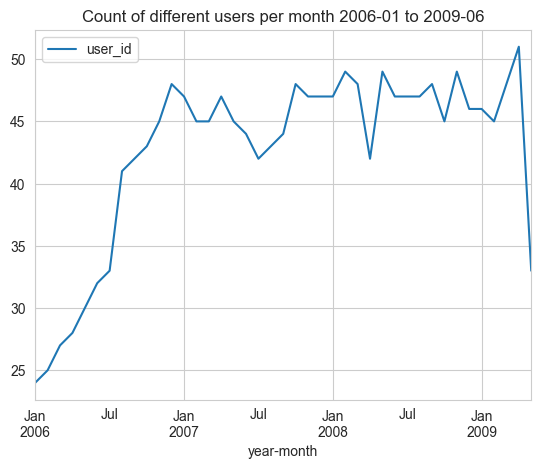

In [97]:
_, _, _ ,_ = sample_time_period(['2006-01', '2009-06'], data_clean)

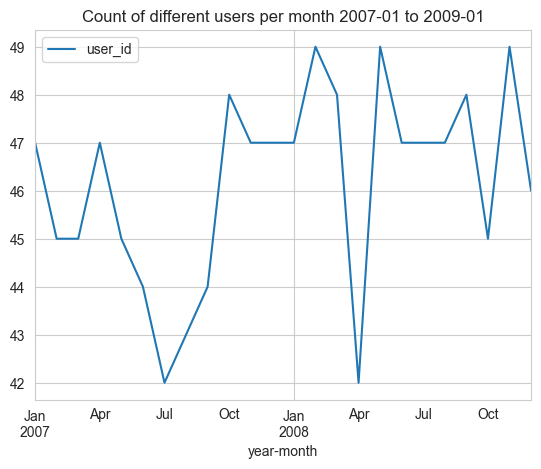

In [98]:
data, _, _ ,_ = sample_time_period(['2007-01', '2009-01'], data_clean)

In [99]:
user_presence_df, user_month_interactions, \
    trimestres, user_trimestre_interactions, \
        semestres, user_semestre_interactions = get_interactions_info(data, 'user_id', quarter_info=True, semester_info=True)

0.0 %
25.0 %
50.0 %
75.0 %


<AxesSubplot:>

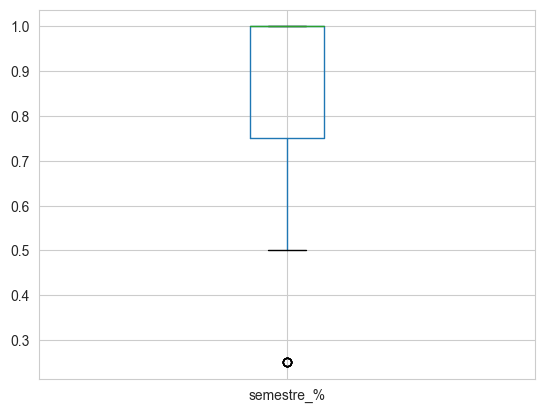

In [101]:
user_presence_df['semestre_%'].plot(kind='box')

# to re-use: generate an track_id

In [71]:
data_clean = df[['timestamp','user_id', 'artist-name','track-name']]
data_clean = data_clean.set_index(['artist-name' ,'track-name'])
data_clean

NameError: name 'df' is not defined

In [ ]:
data_clean.sort_index(inplace=True)
mi = data_clean.index.drop_duplicates()
mi[:5]

MultiIndex([(                    '! Europe - France - Cold Wave', ...),
            ('! Germany - Surfbeat From Beyond The Iron Curtain', ...),
            (                   '! Www.Polskie-Mp3.Tk ! Adam Mi', ...),
            (                  '! Www.Polskie-Mp3.Tk ! Breakout', ...),
            (                  '! Www.Polskie-Mp3.Tk ! Breakout', ...)],
           names=['artist-name', 'track-name'])

In [ ]:
len(mi)

1340450

In [ ]:
data_clean.loc[mi[500]]

timestamp      user_id
artist-name         track-name                                        
'T Hof Van Commerce Niemand Grodder  2008-09-22T19:01:58Z  user_000316
                    Niemand Grodder  2008-02-06T19:22:25Z  user_000316

In [ ]:
data_clean['track_id'] = 'track_x'
for i, m in enumerate(mi):
    data_clean.loc[m, 'track_id'] = 'track_'+str(i)

KeyboardInterrupt: 